<a href="https://colab.research.google.com/github/RyanZha0/CIENE-4011/blob/main/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the dataset
file_path = '/content/drive/MyDrive/CIEN 4011 Big Data in Transportation/Data/big data data analysis.csv'
data = pd.read_csv(file_path)
data.head(), data.columns

(  Table for vehicles  Unnamed: 1 Table for pedestrians (total)  Unnamed: 3  \
 0                 NE          62                            NE       317.0   
 1                 EN          36                            EN       469.0   
 2                 NW          13                            NW       433.0   
 3                 WN           2                            WN       481.0   
 4                 SE          85                            SE       660.0   
 
   Table for cyclists  Unnamed: 5 Table for pedestrians (Older)  Unnamed: 7  
 0                 NE          18                            NE        25.0  
 1                 EN          24                            EN        36.0  
 2                 NW           1                            NW        29.0  
 3                 WN           0                            WN        54.0  
 4                 SE          26                            SE        57.0  ,
 Index(['Table for vehicles', 'Unnamed: 1', 'Table for 

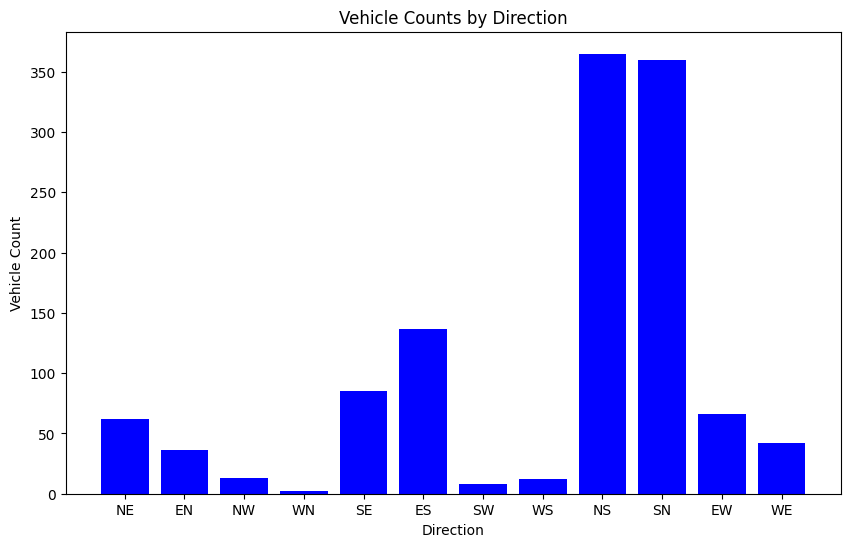

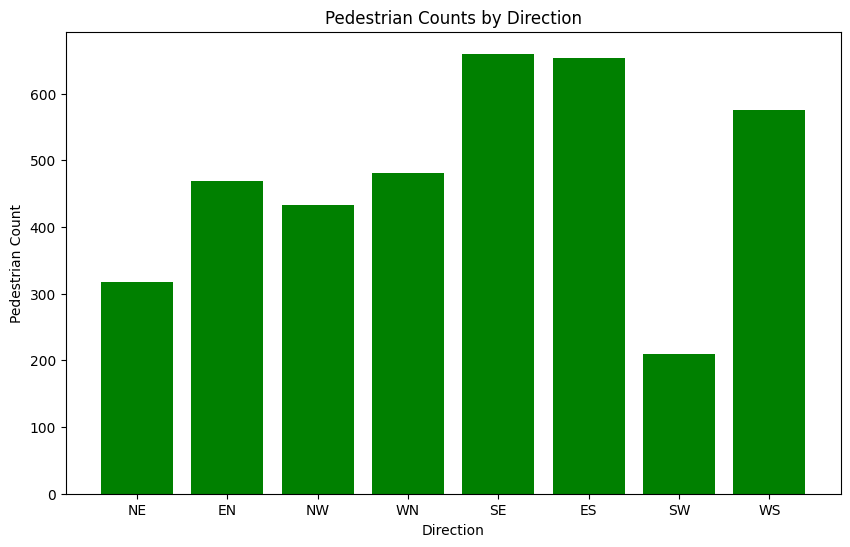

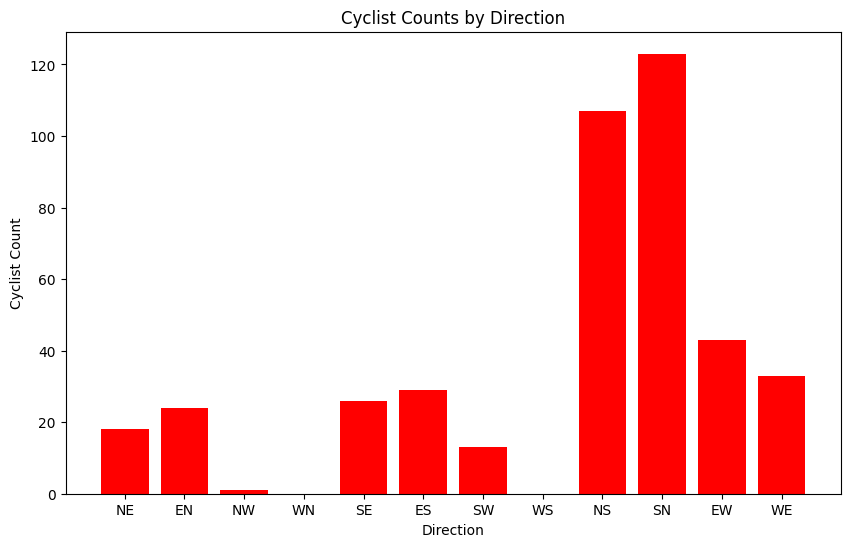

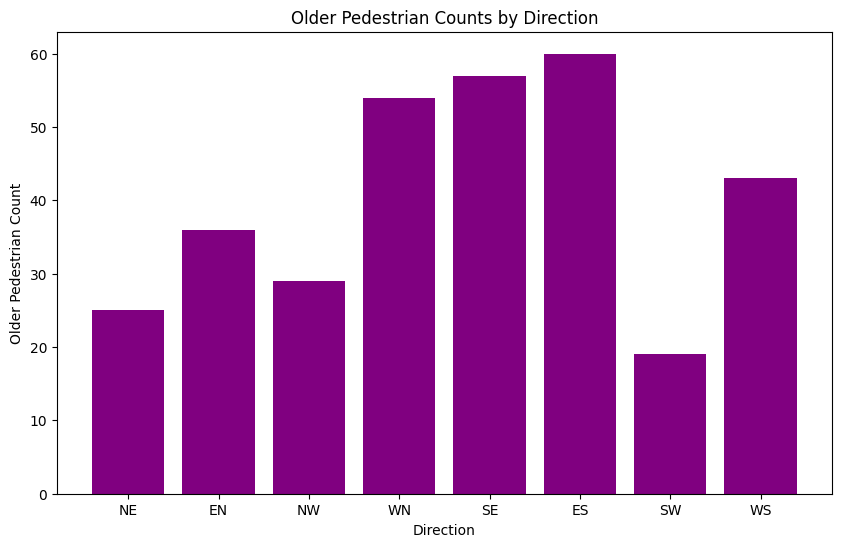

In [ ]:
directions = data['Table for vehicles'].dropna().unique()
vehicle_counts = data['Unnamed: 1'].dropna()
pedestrian_counts = data['Unnamed: 3'].dropna()
cyclist_counts = data['Unnamed: 5'].dropna()
older_pedestrian_counts = data['Unnamed: 7'].dropna()

def plot_bar(data, title, x_label, y_label, color):
    plt.figure(figsize=(10, 6))
    plt.bar(directions[:len(data)], data, color=color)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

# Bar charts for each category
plot_bar(vehicle_counts, 'Vehicle Counts by Direction', 'Direction', 'Vehicle Count', 'blue')
plot_bar(pedestrian_counts, 'Pedestrian Counts by Direction', 'Direction', 'Pedestrian Count', 'green')
plot_bar(cyclist_counts, 'Cyclist Counts by Direction', 'Direction', 'Cyclist Count', 'red')
plot_bar(older_pedestrian_counts, 'Older Pedestrian Counts by Direction', 'Direction', 'Older Pedestrian Count', 'purple')


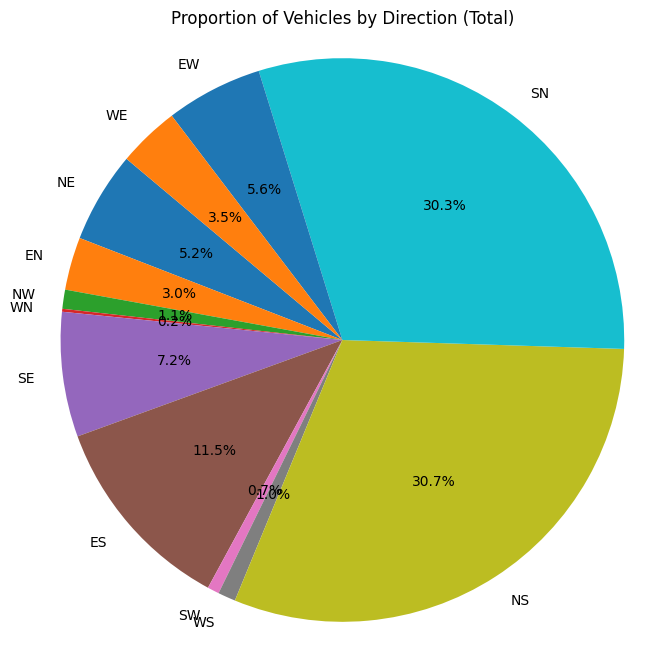

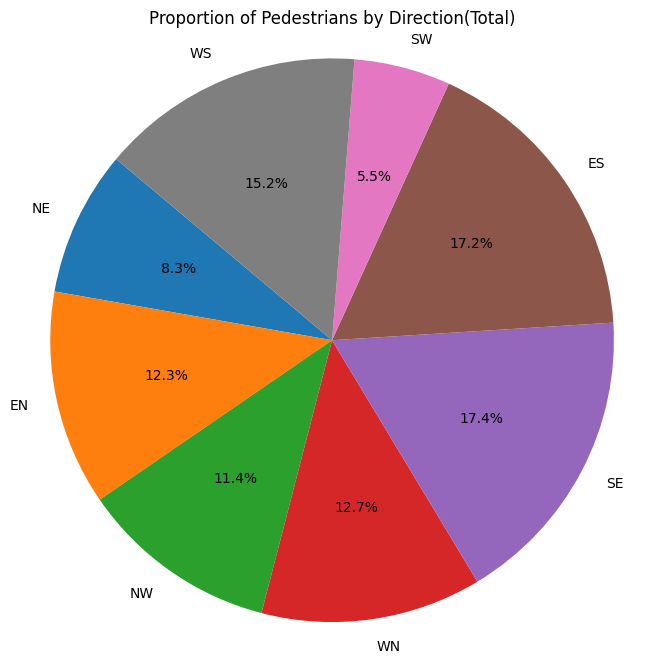

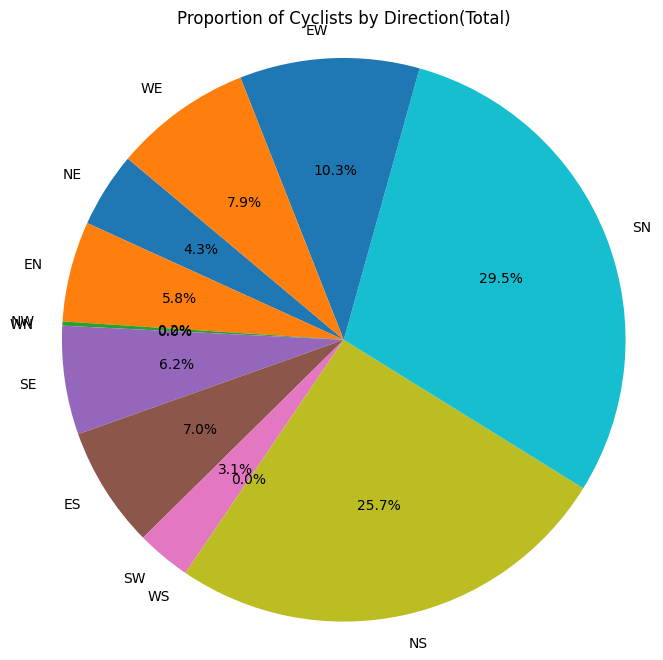

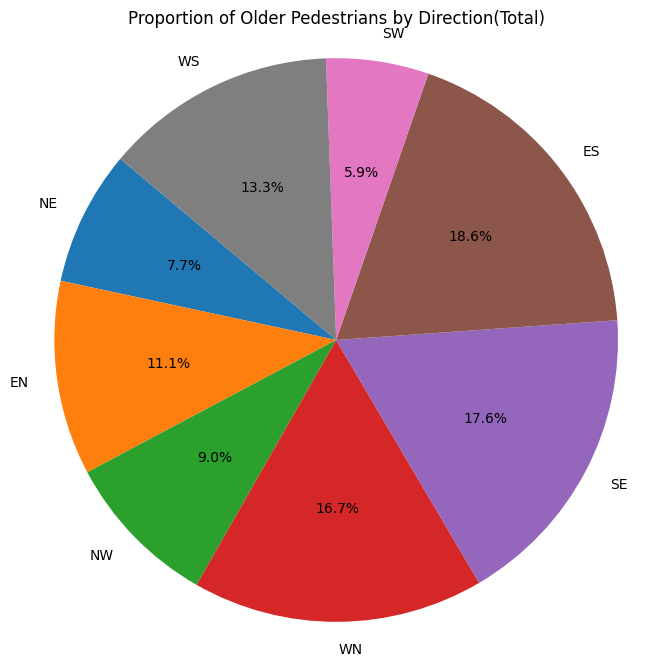

In [ ]:
def plot_pie(data, title):
    plt.figure(figsize=(8, 8))
    plt.pie(data, labels=directions[:len(data)], autopct='%1.1f%%', startangle=140)
    plt.title(title)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

# Pie charts for each category
plot_pie(vehicle_counts, 'Proportion of Vehicles by Direction (Total)')
plot_pie(pedestrian_counts, 'Proportion of Pedestrians by Direction(Total)')
plot_pie(cyclist_counts, 'Proportion of Cyclists by Direction(Total)')
plot_pie(older_pedestrian_counts, 'Proportion of Older Pedestrians by Direction(Total)')


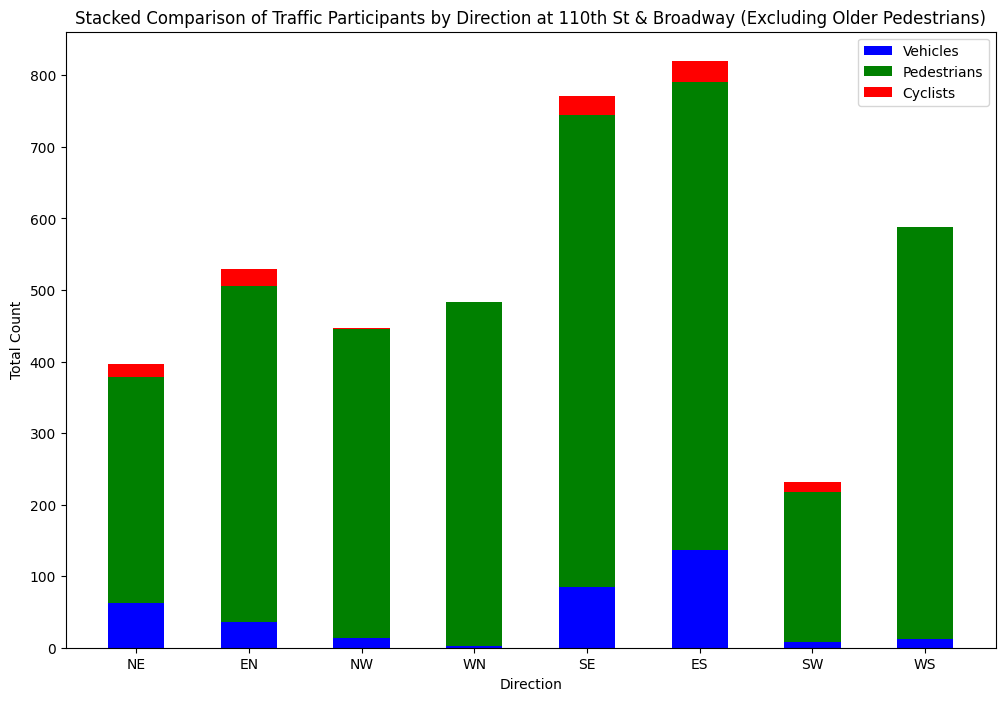

In [ ]:
def plot_combined_stacked_bar(data_list, labels, title, x_label, y_label, colors):
    plt.figure(figsize=(12, 8))
    r = np.arange(len(data_list[0]))  # the label locations
    bottom = np.zeros(len(data_list[0]))

    for data, color, label in zip(data_list, colors, labels):
        plt.bar(r, data, bottom=bottom, color=color, label=label, width=0.5)
        bottom += data

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.xticks(r, ['NE', 'EN', 'NW', 'WN', 'SE', 'ES', 'SW', 'WS'])  # Example directions
    plt.legend()
    plt.show()

# Adjust the data lists to be the same length for the stacked bar chart
min_length = min(len(vehicle_counts), len(pedestrian_counts), len(cyclist_counts), len(older_pedestrian_counts))
adjusted_vehicle_counts = vehicle_counts[:min_length]
adjusted_pedestrian_counts = pedestrian_counts[:min_length]
adjusted_cyclist_counts = cyclist_counts[:min_length]
adjusted_older_pedestrian_counts = older_pedestrian_counts[:min_length]
adjusted_directions = directions[:min_length]

# Create a stacked bar chart without the older pedestrians category
plot_combined_stacked_bar(
    [adjusted_vehicle_counts, adjusted_pedestrian_counts, adjusted_cyclist_counts],
    ['Vehicles', 'Pedestrians', 'Cyclists'],
    'Stacked Comparison of Traffic Participants by Direction at 110th St & Broadway (Excluding Older Pedestrians)',
    'Direction',
    'Total Count',
    ['blue', 'green', 'red'])


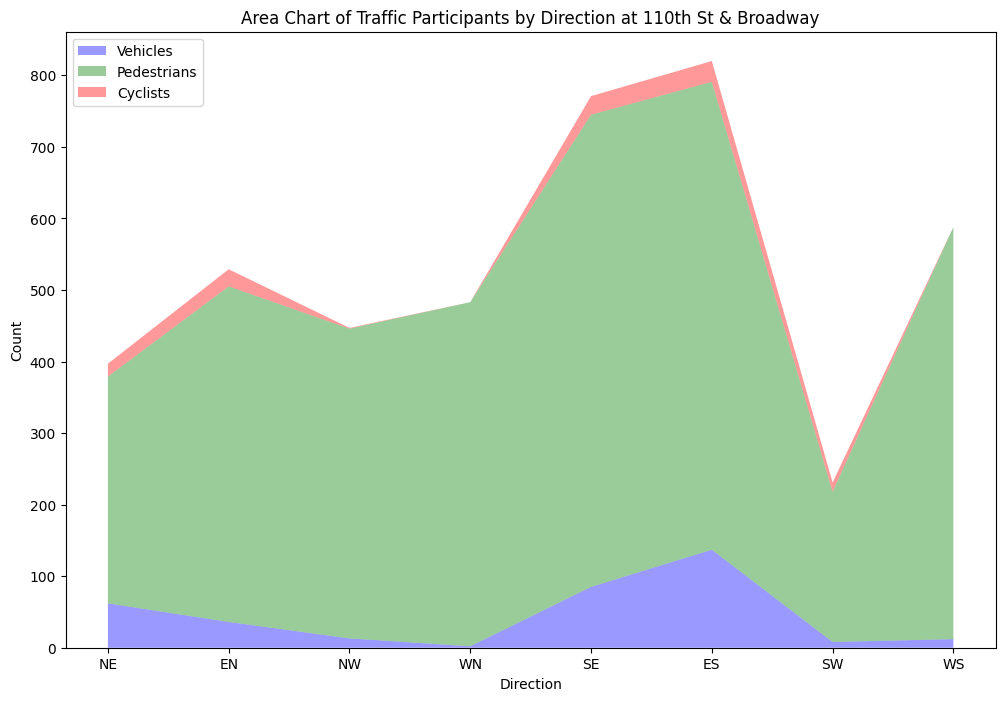

In [ ]:
# Plot an area chart for the counts of vehicles, pedestrians, and cyclists by direction
plt.figure(figsize=(12, 8))
plt.stackplot(adjusted_directions, [adjusted_vehicle_counts, adjusted_pedestrian_counts, adjusted_cyclist_counts],
              labels=['Vehicles', 'Pedestrians', 'Cyclists'], colors=['blue', 'green', 'red'], alpha=0.4)
plt.xlabel('Direction')
plt.ylabel('Count')
plt.title('Area Chart of Traffic Participants by Direction at 110th St & Broadway')
plt.legend(loc='upper left')
plt.show()


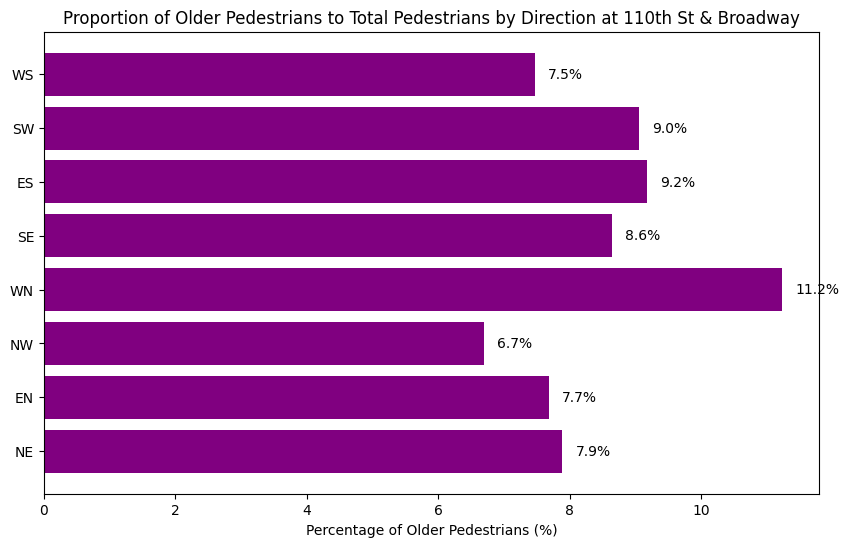

In [ ]:
# Calculate the proportion of older pedestrians to total pedestrians for each direction
proportions_older_to_total = (adjusted_older_pedestrian_counts / adjusted_pedestrian_counts) * 100

# Plotting a horizontal bar chart with percentage labels on the bars
plt.figure(figsize=(10, 6))
bars = plt.barh(adjusted_directions, proportions_older_to_total, color='purple')

# Adding the percentage labels to the bars
for bar in bars:
    plt.text(bar.get_width() + 0.2, bar.get_y() + bar.get_height()/2,
             '{:.1f}%'.format(bar.get_width()),
             va='center')

plt.xlabel('Percentage of Older Pedestrians (%)')
plt.title('Proportion of Older Pedestrians to Total Pedestrians by Direction at 110th St & Broadway')
plt.show()


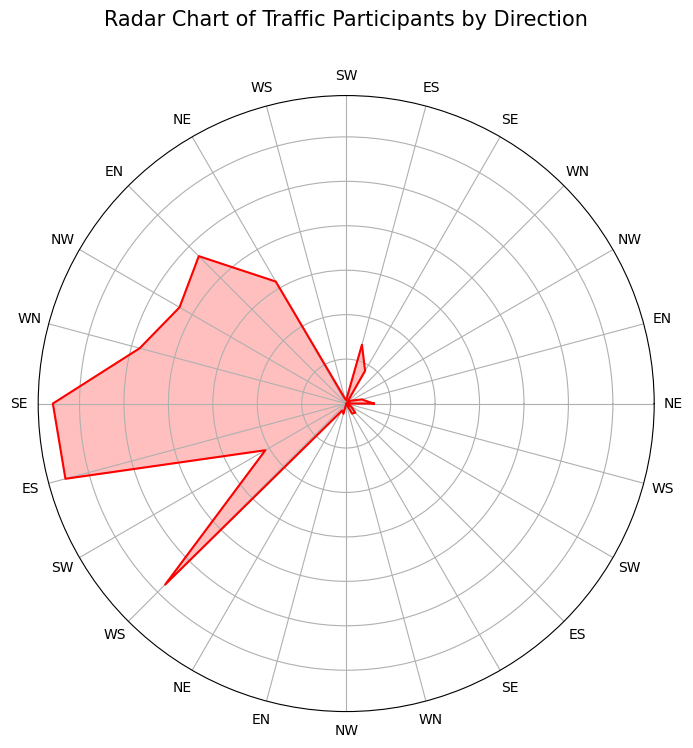